### Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### User Defined Functions

In [2]:
def create_exp(N, A, B):
    expo = A*np.exp(-B*np.arange(0,N))
    return expo
def create_lin(N, a, b):
    lin = a*np.arange(0,N) + b
    return lin
def concat_noise(C, m = 0, s = 1):
    # import numpy as np
    concat = []
    for c in C:
        concat.extend(c)
    X = np.arange(0,len(concat))
    Y = concat +  np.random.normal(loc=m, scale=s, size=len(concat))
    return X, Y

def RMSE(Ypred, Yreal):
    rmse = np.sqrt(np.sum(np.square(Ypred-Yreal))/np.shape(Ypred)[0])
    return rmse
def fit_and_pred(X, y):
    Xarr = np.array(X).reshape(-1,1)
    yarr = np.array(y).reshape(-1,1)
    reg = LinearRegression().fit(Xarr, yarr)
    pred = reg.predict(Xarr)
    rmse = RMSE(pred, yarr)
    return rmse
def sliding_window_pred(X, y, window, lag):
    Xmax = np.shape(X)[0]-window+1
    start = np.arange(0, Xmax, lag)
    score = [fit_and_pred(X[s:s+window], y[s:s+window]) 
            for s in start]    
    return score

### Generate exp and linear parts of the data

In [3]:
expo = create_exp(N = 15000, A = 10 , B = 0.0001)
lin = create_lin(N = 15000, a = -0.00005 , b = expo[-1]-0.01*expo[-1])
print(expo)
print(lin)

[10.          9.99900005  9.9980002  ...  2.23197109  2.23174791
  2.23152474]
[2.2092095 2.2091595 2.2091095 ... 1.4593595 1.4593095 1.4592595]


### Data with weak noise

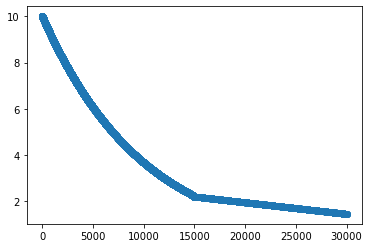

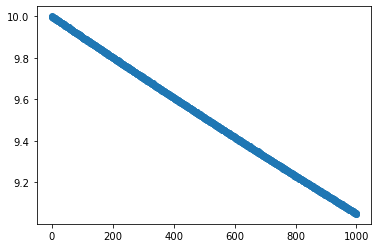

In [14]:
# %% low noise
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.001)

plt.scatter(X,Y)
plt.show()
plt.scatter(X[0:1000],Y[0:1000])
plt.show()

### Implementation of the algorithm and diagnostic plots

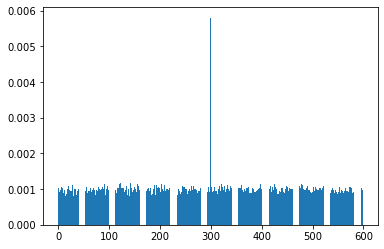

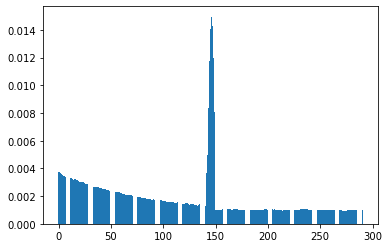

In [15]:
score = sliding_window_pred(X = X, y = Y,
                            window = 100, 
                            lag = 50)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()


# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 1000, 
                            lag = 100)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()

### More Noisy Data

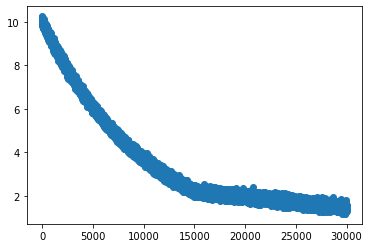

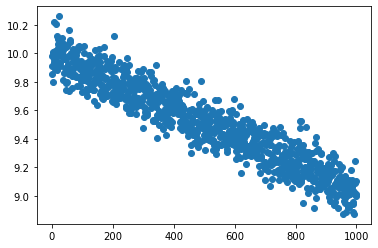

In [16]:
# %% more noisy data
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.1)

# %%
plt.scatter(X,Y)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.show()

#### GridSearch for assessing the best combination of hyperparameters (window, lag)

In [18]:
for i in [2111, 3111, 4811, 5877, 6854]:
    for j in [11, 59, 111, 337, 511, 777]:
        score = sliding_window_pred(X = X, y = Y, 
                                    window = i, 
                                    lag = j)
        deltascore = np.round(np.max(np.diff(score))/0.001,3)
        print("\n for window : {} and lag : {} \n delta max diff score is : {}".vformat(i, j, deltascore))



 for window : 2111 and lag : 11 
 delta max diff score is : 0.544

 for window : 2111 and lag : 59 
 delta max diff score is : 1.212

 for window : 2111 and lag : 111 
 delta max diff score is : 1.651

 for window : 2111 and lag : 337 
 delta max diff score is : 2.298

 for window : 2111 and lag : 511 
 delta max diff score is : 2.747

 for window : 2111 and lag : 777 
 delta max diff score is : 3.745

 for window : 3111 and lag : 11 
 delta max diff score is : 0.506

 for window : 3111 and lag : 59 
 delta max diff score is : 1.353

 for window : 3111 and lag : 111 
 delta max diff score is : 2.1

 for window : 3111 and lag : 337 
 delta max diff score is : 5.142

 for window : 3111 and lag : 511 
 delta max diff score is : 5.997

 for window : 3111 and lag : 777 
 delta max diff score is : 8.251

 for window : 4811 and lag : 11 
 delta max diff score is : 0.52

 for window : 4811 and lag : 59 
 delta max diff score is : 1.508

 for window : 4811 and lag : 111 
 delta max diff score 

### Implementation of the algorithm and diagnostic plots

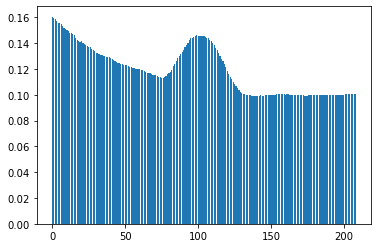

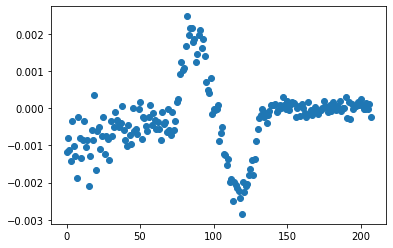

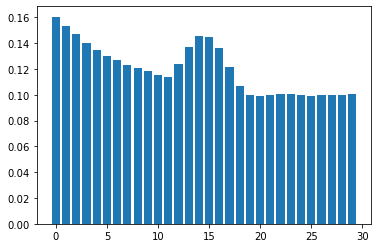

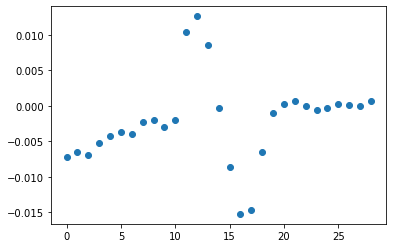

In [20]:
score = sliding_window_pred(X = X, y = Y, 
                            window = 6854, 
                            lag = 111)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()



plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()

# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 6854, 
                            lag = 777)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()

plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()


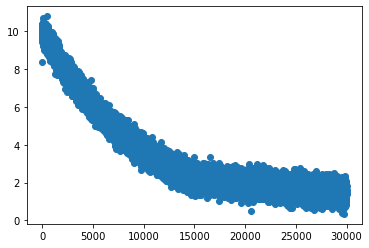

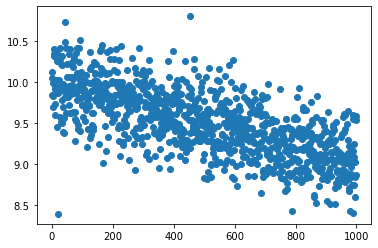

In [21]:
# %% still more noisy data
X, Y = concat_noise(C = [expo,lin], m = 0, s = 0.3)

# %%
plt.scatter(X,Y)
plt.show()

plt.scatter(X[0:1000],Y[0:1000])
plt.show()


#### GridSearch for assessing the best combination of hyperparameters (window, lag)

In [22]:
for i in [2111, 3111, 4811, 5877, 6854]:
    for j in [11, 59, 111, 337, 511, 777, 1279, 2447]:
        score = sliding_window_pred(X = X, y = Y, 
                                    window = i, 
                                    lag = j)
        deltascore = np.round(np.max(np.diff(score)-np.mean(np.diff(score)))/0.001,3)
        print("\n for window : {} and lag : {} \n delta max diff score is : {}".format(i, j, deltascore))



 for window : 2111 and lag : 11 
 delta max diff score is : 1.765

 for window : 2111 and lag : 59 
 delta max diff score is : 3.091

 for window : 2111 and lag : 111 
 delta max diff score is : 3.667

 for window : 2111 and lag : 337 
 delta max diff score is : 7.283

 for window : 2111 and lag : 511 
 delta max diff score is : 5.881

 for window : 2111 and lag : 777 
 delta max diff score is : 8.414

 for window : 2111 and lag : 1279 
 delta max diff score is : 9.122

 for window : 2111 and lag : 2447 
 delta max diff score is : 11.48

 for window : 3111 and lag : 11 
 delta max diff score is : 1.285

 for window : 3111 and lag : 59 
 delta max diff score is : 2.736

 for window : 3111 and lag : 111 
 delta max diff score is : 2.347

 for window : 3111 and lag : 337 
 delta max diff score is : 4.541

 for window : 3111 and lag : 511 
 delta max diff score is : 4.634

 for window : 3111 and lag : 777 
 delta max diff score is : 4.966

 for window : 3111 and lag : 1279 
 delta max dif

### Implementation of the algorithm and diagnostic plots

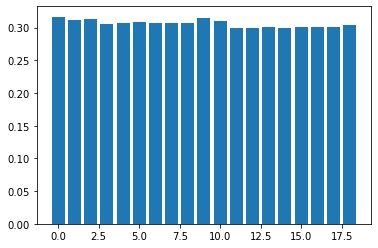

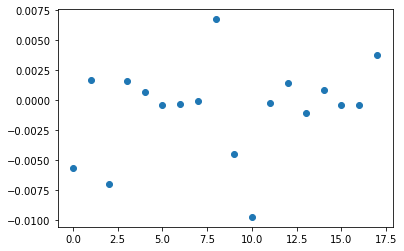

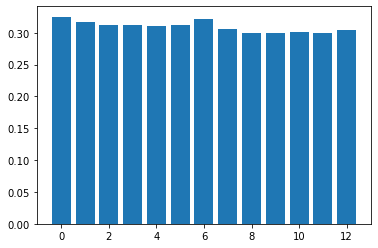

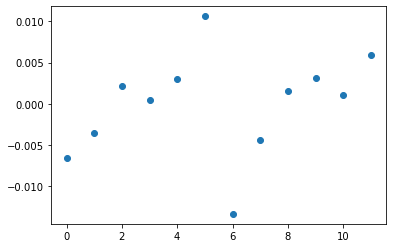

In [25]:
score = sliding_window_pred(X = X, y = Y, 
                            window = 5877, 
                            lag = 1279)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()



plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score))
plt.show()

# %%
score = sliding_window_pred(X = X, y = Y, 
                            window = 6854, 
                            lag = 1900)
plt.bar(np.arange(0,np.shape(score)[0]),score)
plt.show()

plt.scatter(np.arange(0,np.shape(np.diff(score))[0]),np.diff(score)-np.mean(np.diff(score)))
plt.show()


# Other useful methods

https://link.medium.com/hGdVrrxPabb

https://github.com/arvkevi/kneed

https://stackoverflow.com/questions/28269379/curve-curvature-in-numpy

https://iescoders.com/calculating-the-curvature-of-a-curve/

https://github.com/Pjer-zhang/PJCurvature/blob/master/src/py/PJcurvature_demo.ipynb